In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from utils.plot import compare_classifiers

%matplotlib inline

# Classification

## Generate data

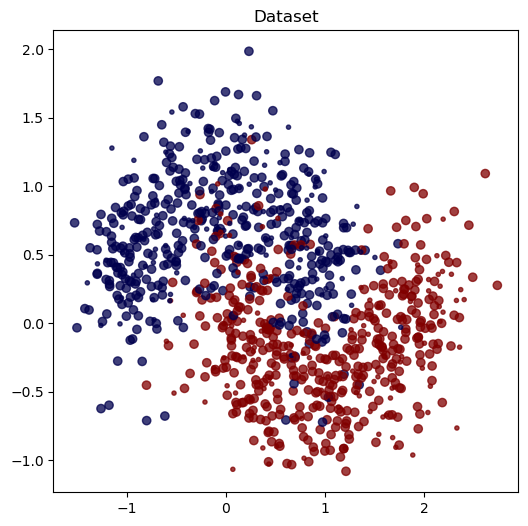

In [2]:
X, y = make_moons(n_samples=1000, noise=0.3)
# convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1
# generate data samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cmap = 'seismic'
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, cmap=cmap, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], 
            marker='.', c=y_test, cmap=cmap, alpha=0.75)
plt.title('Dataset')
plt.show()

# Desicion tree

In [3]:
from my_models.desicion_tree import MyDT
from sklearn.tree import DecisionTreeClassifier

data = np.hstack((X_train, y_train.reshape(y_train.shape[0], 1)))

dt = MyDT()
dt.fit(data)

dt_sklearn = DecisionTreeClassifier()
dt_sklearn.fit(X_train, y_train)

DecisionTreeClassifier()

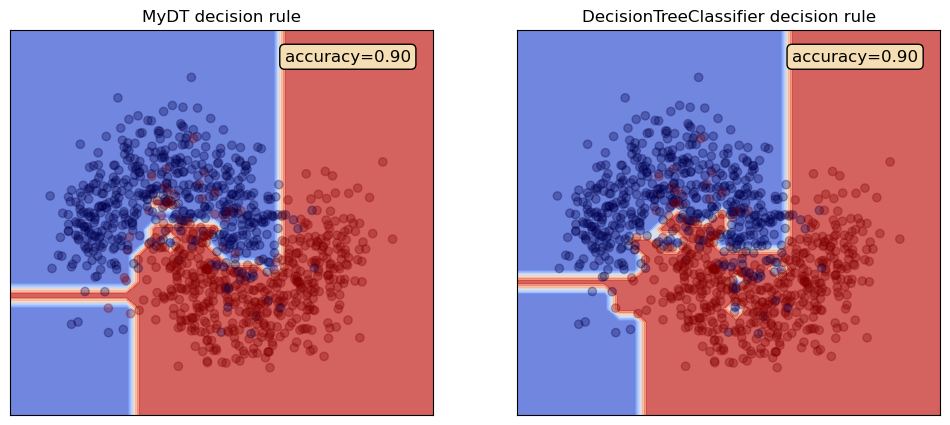

In [4]:
compare_classifiers([dt, dt_sklearn], X_test, y_test, xx, yy, X, y)

## AdaptiveBoosting

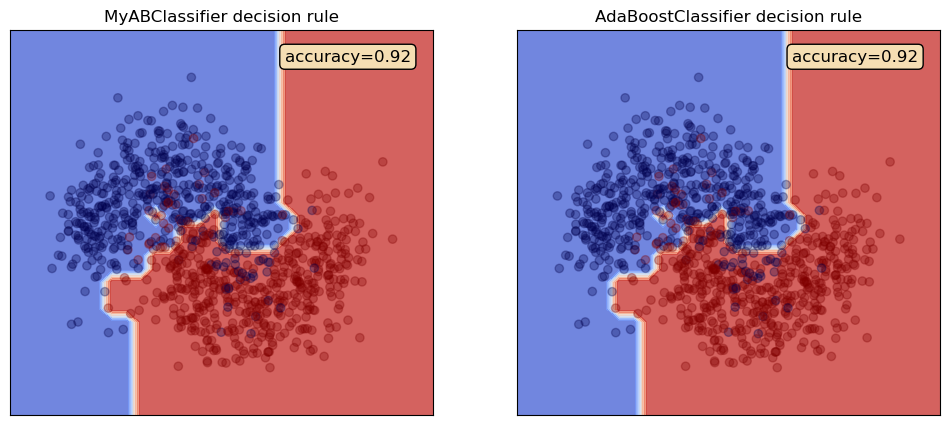

In [5]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from my_boosting_machines.adaptive_boosting import MyABClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
my_ada_boost = MyABClassifier(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
my_ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=max_depth),
    algorithm="SAMME",
    n_estimators=n_estimators
    )
ada_boost_sklearn.fit(X_train, y_train)

compare_classifiers([my_ada_boost, ada_boost_sklearn], 
                    X_test, y_test, xx, yy, X, y)

## GradientBoosting

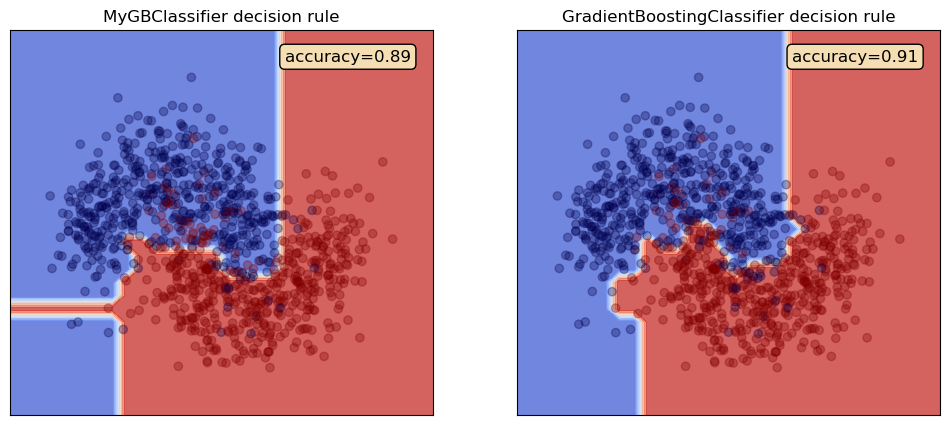

In [6]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from my_boosting_machines.gradient_boosting import MyGBClassifier

max_depth = 5
n_estimators = 100
learning_rate = 0.1

my_gradient_boost = MyGBClassifier(max_depth=max_depth)
my_gradient_boost.fit(X_train, y_train, n_estimators=n_estimators, 
              learning_rate=learning_rate)

gradient_boost_sklearn = GradientBoostingClassifier( 
    n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth
    )
gradient_boost_sklearn.fit(X_train, y_train)

compare_classifiers([my_gradient_boost, gradient_boost_sklearn], 
                    X_test, y_test, xx, yy, X, y)